# 기계학습 팀 소믈리에 와인 등급 예측
## kNN 0509
### 다중분류가 아닌 이진분류일때

In [1]:
import numpy as np
import pandas as pd

In [9]:
# csv를 가져와 넘파이배열 형태의 데이터셋으로 가공하는 과정
import csv
f1=open('winequality-red.csv','r',encoding='UTF-8')
f2=open('winequality-white.csv','r',encoding='UTF-8')
red_wine_data = csv.reader(f1)
white_wine_data = csv.reader(f2)
raw1=[]# 가공 전 레드와인 데이터를 넣어둘 리스트
raw2=[]# 가공 전 화이트와인 데이터를 넣어둘 리스트

total_data=[]# 가공된 모든 와인 데이터를 넣어둘 리스트

features=[]# 특성 이름을 모아둘 리스트
feat=[]# csv에 "특성이름" 의 형태로 들어가 있어서 ""을 제거하기 전 특성 이름 리스트
target=[]# 정답인 등급을 모아둘 리스트

for r in red_wine_data:
    r=r[0].split(';')
    r.insert(0,'1')#red가 1
    raw1.append(r)

for w in white_wine_data:
    w=w[0].split(';')
    w.insert(0,'0')#white가 0
    raw2.append(w)

raw1[0].pop(0)# 와인의 색 정보로 위에서 넣어둔 1을 빼냄
feat=raw1[0]
for f in feat:
    s=f[1:len(f)-1]# ""을 제거하는 부분
    features.append(s)
features.insert(0,'color')

# csv의 첫번째 행이 특성 정보이므로 그것을 없애는 작업
raw1.pop(0)
raw2.pop(0)

for i1 in raw1:
    total_data.append(i1)

for i2 in raw2:
    total_data.append(i2)

for t in total_data:
    target.append(t.pop())


total_data=np.array(total_data)
total_data = total_data.astype(np.float64)# 실행했을때 밑의 경고문이 떠서 추가
"""
FutureWarning:
Beginning in version 0.22,
arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'.
It is recommended that you convert the array to a float dtype before using it in scikit-learn
"""

import copy

target_5=copy.deepcopy(target) # 1~4 / 5~10
target_6=copy.deepcopy(target) # 1~5 / 6~10
target_7=copy.deepcopy(target) # 1~6 / 7~10

for i in range(0,len(target_5)):
    if int(target_5[i])<5:
        target_5[i]='0'
    else:
       target_5[i]='1'
        
for i in range(0,len(target_6)):
    if int(target_6[i])<5:
        target_6[i]='0'
    else:
       target_6[i]='1'
        
for i in range(0,len(target_7)):
    if int(target_7[i])<5:
        target_7[i]='0'
    else:
       target_7[i]='1'
        
target_5=np.array(target_5)
target_5 = target_5.astype(np.float64)
target_6=np.array(target_6)
target_6 = target_6.astype(np.float64)
target_7=np.array(target_7)
target_7 = target_7.astype(np.float64)

f1.close()
f2.close()

print("특성: ")
print(features)
print(target_5)

특성: 
['color', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
[1. 1. 1. ... 1. 1. 1.]


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# k의 차이에 따른 결과를 보기 위해, 다른 데이터셋에 따른 결과를 보기 위해 편리하게 사용할 목적으로 정의한 함수
def knn_by_n(n,x,y,test,pred):
    #매개변수는 순서대로 k, 훈련데이터 특성배열, 훈련데이터 타겟배열, 테스트셋 특성배열, 테스트셋 타겟배열
    knn=KNeighborsClassifier(n)#k=n인 knn
    knn.fit(x, y)
    y_pred = knn.predict(test)
    return np.mean(y_pred==pred)# 테스트셋의 정확도를 반환

### 1-4 / 5-10

In [10]:
# 훈련 데이터와 테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(total_data, target_5, random_state=0)
# 훈련 데이터 크기 확인
print(x_train.shape)
print(y_train.shape)
# 테스트 데이터 크기 확인
print(x_test.shape)
print(y_test.shape)

knn=KNeighborsClassifier(n_neighbors=1)#k=1인 knn
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test)))

(4872, 12)
(4872,)
(1625, 12)
(1625,)
테스트 세트의 정확도: 0.95


In [11]:
l=[]# 반환된 정확도를 모아둘 배열
for i in range(1,1625):#가장 가까운 1개 부터 시작해서 자신을 제외한 모든 것에 대해 kNN 시행(전부 다 하면 진짜 오래 걸립니다ㅠㅜ)
    #최대 k = 1625
    l.append(knn_by_n(i,x_train,y_train,x_test,y_test))
print(l)
best=float(l[0])
for i in l:
    if i>best:
        best=i
print(best)
print("k가 " + str(l.index(best)+1) + "일때 정확도 " + str(best) + "가 최대 정확도")

[0.9513846153846154, 0.9224615384615384, 0.9581538461538461, 0.9544615384615385, 0.9581538461538461, 0.9569230769230769, 0.9593846153846154, 0.9587692307692308, 0.9587692307692308, 0.9587692307692308, 0.96, 0.96, 0.9593846153846154, 0.9593846153846154, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.9

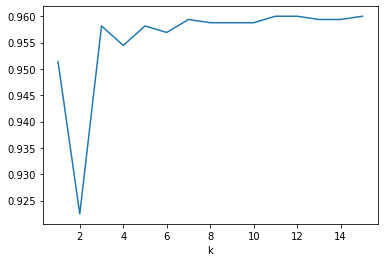

In [27]:
import matplotlib.pyplot as plt

data = [("k","정확도")]
for i in range(0,15):
    data.append((i+1,l[i]))

df=pd.DataFrame(data, columns=["k","정확도"])
df1=df.drop(0)
df2=df1.set_index("k")
s = df2["정확도"]
ax = s.plot()

### 1-5 / 6-10

In [12]:
# 훈련 데이터와 테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(total_data, target_6, random_state=0)
# 훈련 데이터 크기 확인
print(x_train.shape)
print(y_train.shape)
# 테스트 데이터 크기 확인
print(x_test.shape)
print(y_test.shape)

knn=KNeighborsClassifier(n_neighbors=1)#k=1인 knn
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test)))

(4872, 12)
(4872,)
(1625, 12)
(1625,)
테스트 세트의 정확도: 0.95


In [13]:
l2=[]# 반환된 정확도를 모아둘 배열
for i in range(1,1625):#가장 가까운 1개 부터 시작해서 자신을 제외한 모든 것에 대해 kNN 시행(전부 다 하면 진짜 오래 걸립니다ㅠㅜ)
    #최대 k = 1625
    l2.append(knn_by_n(i,x_train,y_train,x_test,y_test))
print(l2)
best2=float(l[0])
for i in l2:
    if i>best2:
        best2=i
print(best2)
print("k가 " + str(l2.index(best2)+1) + "일때 정확도 " + str(best2) + "가 최대 정확도")

[0.9513846153846154, 0.9224615384615384, 0.9581538461538461, 0.9544615384615385, 0.9581538461538461, 0.9569230769230769, 0.9593846153846154, 0.9587692307692308, 0.9587692307692308, 0.9587692307692308, 0.96, 0.96, 0.9593846153846154, 0.9593846153846154, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.9

NameError: name 'bes2t' is not defined

### 1-6 / 7-10

In [14]:
# 훈련 데이터와 테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(total_data, target_7, random_state=0)
# 훈련 데이터 크기 확인
print(x_train.shape)
print(y_train.shape)
# 테스트 데이터 크기 확인
print(x_test.shape)
print(y_test.shape)

knn=KNeighborsClassifier(n_neighbors=1)#k=1인 knn
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test)))

(4872, 12)
(4872,)
(1625, 12)
(1625,)
테스트 세트의 정확도: 0.95


In [15]:
l3=[]# 반환된 정확도를 모아둘 배열
for i in range(1,1625):#가장 가까운 1개 부터 시작해서 자신을 제외한 모든 것에 대해 kNN 시행(전부 다 하면 진짜 오래 걸립니다ㅠㅜ)
    #최대 k = 1625
    l3.append(knn_by_n(i,x_train,y_train,x_test,y_test))
print(l3)
best3=float(l[0])
for i in l3:
    if i>best3:
        best3=i
print(best3)
print("k가 " + str(l3.index(best3)+1) + "일때 정확도 " + str(best3) + "가 최대 정확도")

[0.9513846153846154, 0.9224615384615384, 0.9581538461538461, 0.9544615384615385, 0.9581538461538461, 0.9569230769230769, 0.9593846153846154, 0.9587692307692308, 0.9587692307692308, 0.9587692307692308, 0.96, 0.96, 0.9593846153846154, 0.9593846153846154, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.9